In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Praktikum 3/Data/socr.csv')
display(df.head())

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [21]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [22]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(tinggi_cm=lambda x: x["tinggi_cm"] * 2.54,
            berat_kg=lambda x: x["berat_kg"] * 0.453592
)
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [23]:
from sklearn.model_selection import train_test_split

# variabel independent/bebas
X =  df1[['tinggi_cm']]

# variabel dependent/terikat
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


Pemodelan data : dengan data training

In [24]:
from sklearn.linear_model import LinearRegression

#buat objek model instan dari class LinearRegression
model = LinearRegression()

#Lakukan proses tarining
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# import library yang dibutuhkan
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2']=r2
df_resume['Koefisien (Kg/cm)']= model.coef_[0]
df_resume['Intercept (Kg)']= model.intercept_[0]
df_resume['MAE (kg)']= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (kg)']= mse
df_resume['RMSE (kg)']= rmse
df_resume

,R2,Koefisien (Kg/cm),Intercept (Kg),MAE (kg),MSE (kg),RMSE (kg)
0,NaN,0.551822,-37.656882,3.670411,21.242936,4.609006


Cetak persamaan Regresi

In [26]:
slope = model.coef_[0].item()
intercept = model.intercept_[0].item()
print(f"Persamaan: y = {slope:.3f} * X + {intercept:.3f}")

Persamaan: y = 0.552 * X + -37.657


Plot Regresi

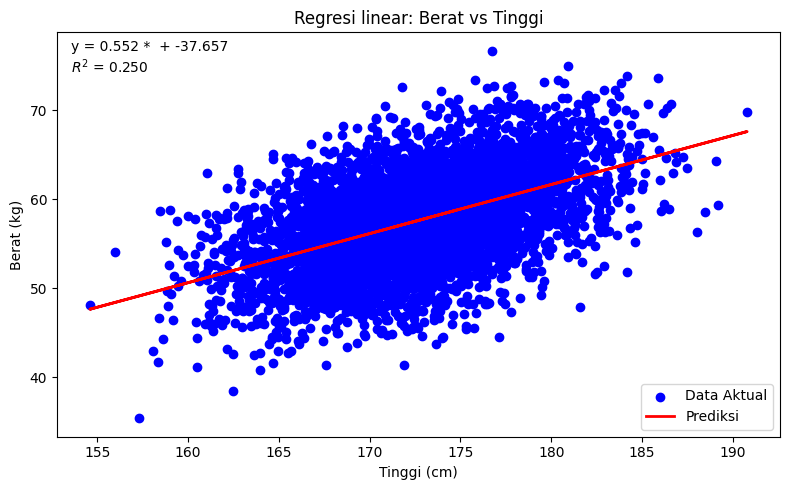

In [27]:
import matplotlib.pyplot as plt

#Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

#Garis Regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} *  + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"

)
plt.legend()
plt.tight_layout()
plt.show()


Data testing dari Mahasiswa

In [28]:
df_ti2022 = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Praktikum 3/Data/berat_ti.csv', sep=';')
df_ti2022

,No,Nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Kayla,160,70.3
4,5,Bani,183,65.8


In [29]:
#ambil X_testing
X_testing = df_ti2022[['tinggi_cm']]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [30]:
y_pred_testing = model.predict(X_testing)
df_ti2022['berat_kg'] = y_pred_testing
df_ti2022

,No,Nama,tinggi_cm,actual_berat,berat_kg
0,1,Rafa,168,58.5,55.049180
1,2,Tiara,162,78.2,51.738249
2,3,Tia,155,52.7,47.875496
3,4,Kayla,160,70.3,50.634605
4,5,Bani,183,65.8,63.326507


In [31]:
data = pd.read_csv("/content/gdrive/MyDrive/Machine Learning/Praktikum 3/Data/berat_ti.csv", sep=';')

y_pred = model.predict(data[['tinggi_cm']])

#Selisih error (positif=overpredict)
data['prediksi_kg'] = y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["actual_berat"]

#Akurasi perbaris
denom = data["actual_berat"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

data

,No,Nama,tinggi_cm,actual_berat,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049180,-3.450820,94.101162
1,2,Tiara,162,78.2,51.738249,-26.461751,66.161443
2,3,Tia,155,52.7,47.875496,-4.824504,90.845344
3,4,Kayla,160,70.3,50.634605,-19.665395,72.026465
4,5,Bani,183,65.8,63.326507,-2.473493,96.240891


In [32]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Praktikum 3/Data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [33]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk","Umur (bulan)":"umur_bulan",
                        "Tinggi Badan (cm)": "tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())
df1["jk"] = df1["jk"].map({"Perempuan": 0, "Laki-laki": 1})
df1.head()

,berat_kg,jk,umur_bulan,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [34]:
#Hitung matriks korelasi

corr_matrix = df1.corr()

print(corr_matrix)

            berat_kg        jk  umur_bulan  tinggi_cm
berat_kg    1.000000  0.045797    0.665389   0.626005
jk          0.045797  1.000000    0.004046   0.073505
umur_bulan  0.665389  0.004046    1.000000   0.875869
tinggi_cm   0.626005  0.073505    0.875869   1.000000


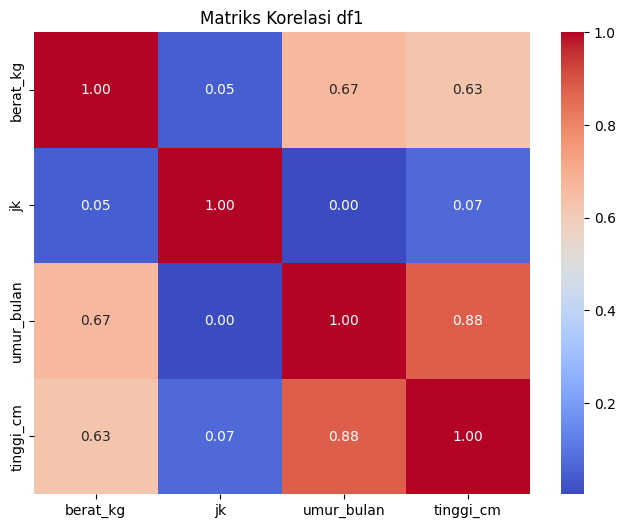

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

#Misal target (Y) adalah berat badan, #Variabel dependen
y = df1["berat_kg"]

#Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bulan", "tinggi_cm"]]

#Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#cetak pembagian data
print("jumlah data train :", len(X_train))
print("jumlah data test :", len(X_test))

#cek apakah sudah ada constanta pada data training
X_train.head()

jumlah data train : 80000
jumlah data test : 20000


,umur_bulan,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [37]:
import statsmodels.api as sm
#Tambahkan constanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bulan,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [38]:
import statsmodels.api as sm

#Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('------------------')
print(model.params)
print('------------------')
const = model.params['const']
x1_umur = model.params['umur_bulan']
x2_tinggi = model.params['tinggi_cm']

#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2")

------------------
const         2.545617
umur_bulan    0.229719
tinggi_cm     0.054192
dtype: float64
------------------
y = 2.546 + 0.230 * x1 + 0.054 * x2


In [39]:
# Tampilkan hasil ringkasan
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:02:49   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

Pengujian model dengan data testing

In [41]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bulan"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
